# Simulation Analysis Notebook

This Jupyter Notebook is designed to introduce a user to the PyGkyl library (unofficial naming). 
It includes many different examples of diagnostic tools that can be used to analyze Gkeyll GK simulation data. 

Antoine C.D. Hoffmann (@antoinehoff) -- Jan 13, 2025

## Table of Contents
0. [Installation of pygkyl](#install)<br>
1. [Prologue](#prologue)<br>
    1.1 [Setup and Imports](#setup_imports)<br>
    1.2 [Simulation Data Setup](#data_setup)<br>
    1.3 [Simulation Class Initialization](#simulation_class)<br>
    1.4 [Source Profiles and Input Power](#sources)<br>
    1.5 [Time Frame and normalization](#time_frames)<br>

2. [Simulation Data Analysis](#sim_analysis)<br>
    2.1 [1D Profile Relaxation](#1d_profile)<br>
    2.2 [Space-Time Diagrams](#space_time)<br>
    2.3 [Two-Dimensional Cut](#2d_cut)<br>
    2.4 [Space-Time Fluctuation](#st_fluct_plot)<br>
    2.5 [Two-Dimensional Fluctuation](#2d_fluct_plot)<br>
    2.6 [Time-Averaged Profile](#time_averaged_profile)<br>
    2.7 [Movie Generator](#movie_generator)<br>
    2.8 [Flux Surface Time-Average Profiles](#fs_time_averaged_profile)<br>
    2.9 [Time series](#time_series)<br>
    2.10 [Phase Space Analysis](#dist_funct)<br>
    2.11 [DG Representation](#dg_rep)<br>
    2.12 [Poloidal projection plot](#pol_plot)<br>
    2.13 [Flux surface projection plot](#fs_plot)<br>
    2.14 [Full torus projection plot](#tor_plot)<br>

3. [Interfaces](#interfaces)<br>
    3.1 [Thungsten transport with Flan](#flan)<br>
    3.2 [Local GK flux tube simulations with GYACOMO](#gyacomo)<br>

## 0. Installation of pygkyl <a id="install"></a>
Here we will install pygkyl, a Python package for working with GKYL data structures and analyzing numerical simulations of turbulence in tokamaks.
Uncomment the lines below to install or refresh pygkyl and its dependencies.

In [1]:
path_to_pygkyl = '~/pygkyl_install/'
import sys
import os
if path_to_pygkyl not in sys.path:
    sys.path.append(os.path.expanduser(path_to_pygkyl))

if not os.path.exists(os.path.join(os.path.expanduser(path_to_pygkyl), '.git')):
    os.system(f'git clone https://github.com/Antoinehoff/personal_gkyl_scripts.git {path_to_pygkyl}')
else:
    os.system(f'cd {os.path.expanduser(path_to_pygkyl)} && git pull')
    
# run the installation script
script_path = os.path.join(path_to_pygkyl, 'scripts/pygkyl_install.py')
os.system(f'python3 {script_path}');

From https://github.com/Antoinehoff/personal_gkyl_scripts
   a377ae3..a426004  main       -> origin/main


Updating a377ae3..a426004
Fast-forward
 pygkyl/pygkyl/classes/dataparam.py | 25 ++++++++++++++-----------
 pygkyl/pygkyl/classes/frame.py     |  8 +++++---
 2 files changed, 19 insertions(+), 14 deletions(-)
Installing pygkyl and dependencies...
-Base path: /Users/ahoffman
-Postgkyl path: /Users/ahoffman/postgkyl
-Personal gkyl scripts path: /Users/ahoffman/personal_gkyl_scripts
-Pygkyl path: /Users/ahoffman/personal_gkyl_scripts/pygkyl


1.0 Check if postgkyl repository exists
1.1 Pull postgkyl repository
Already up to date.
1.2 Install postgkyl (required for pygkyl)
2.0 Check if personal_gkyl_scripts repository exists
2.2 Pull personal_gkyl_scripts repository
Already up to date.
2.3 Remove old pygkyl egg-info and build directories
2.4 Install pygkyl (personal gkyl scripts)
->pygkyl installed successfully


We can now import the library.

In [2]:
import pygkyl

## 1. Prologue <a id="prologue"></a>
This section imports necessary libraries and custom routines required for the analysis. It also builds a Simulation class instance that will deliver helpful data to the plotting routine. Finally, it looks for the available simulation frames.

### 1.1 Simulation Data Path <a id="data_setup"></a>
Set up the path to the simulation data and its file prefix.

In [3]:
simdir = '/Users/ahoffman/personal_gkyl_scripts/sim_data_dir_example/3x2v_example/gk_tcv_posD_iwl_3x2v_electron_heating'
fileprefix = 'gk_tcv_posD_iwl_3x2v_D02'

### 1.2 Simulation Class Initialization <a id="simulation_class"></a>
Initialize the `Simulation` class (see /python_utilities/classes/simulation.py) and set physical and geometric parameters.

The simulation class is made to contain every parameter and information about the simulation we want to analyze. It is meant to store geometry, metric, where the data are located and how they were generated. It will be used by all plot and post processing routines.

For now we pass many simulation parameters manually as not all simulation parameters are stored in the output file metadata. The parameters of some simulation configurations are stored in `pygkyl/configs/simulation_configs.py`, we load them from here to make the code sparser.

In [4]:
simulation = pygkyl.simulation_configs.import_config('d3d_nt', simdir, fileprefix)

In [5]:
# simulation.geom_param.info()

### 1.3 Time Frame and normalization <a id="time_frames"></a>
Load available time frames and integrated moment diagnostics.

We can set up different units for the plots. These calls will adapt automatically all plotting routine, setting up the axes accordingly.

We also look for all available frames, i.e. we look for all number XX in "[fileprefix]-[fieldname]_XX.gkyl"

In [6]:

simulation.normalization.set('t','mus') # time in micro-seconds
simulation.normalization.set('x','minor radius') # radial coordinate normalized by the minor radius (rho=r/a)
simulation.normalization.set('y','Larmor radius') # binormal in term of reference sound Larmor radius
simulation.normalization.set('ky','rho_i') # binormal wavenumber in term of reference sound Larmor radius
simulation.normalization.set('z','pi') # parallel angle devided by pi
simulation.normalization.set('fluid velocities','thermal velocity') # fluid velocity moments are normalized by the thermal velocity
simulation.normalization.set('temperatures','eV') # temperatures in electron Volt
simulation.normalization.set('pressures','Pa') # pressures in Pascal
simulation.normalization.set('energies','MJ') # energies in mega Joules
simulation.normalization.set('current','kA') # currents in kA
simulation.normalization.set('gradients','major radius') # gradients are normalized by the major radius

# For printing the available normalizations
# simulation.normalization.info()


## 2. Simulation Data Analysis <a id="sim_analysis"></a>
We now use the plot routines defined in `python_utilities/tools/plot_utils.py` to generated various plots from the Simulation instance.
You can use `simulation.data_param.help()` to display what fields are available

In [7]:
# simulation.data_param.info()

We look for frames in the simulation data directory and store them in a list that will be used through the whole notebook.

In [8]:
sim_frames = simulation.available_frames['field'] # you can check the available frames for each data type like ion_M0, ion_BiMaxwellian, etc.)
print("%g time frames available (%g to %g)"%(len(sim_frames),sim_frames[0],sim_frames[-1]))

232 time frames available (0 to 231)


Plot the integrated moment diagnostic. Additional options for computing the time derivative `ddt` and plotting only on a specific time interval `twindow` are available.

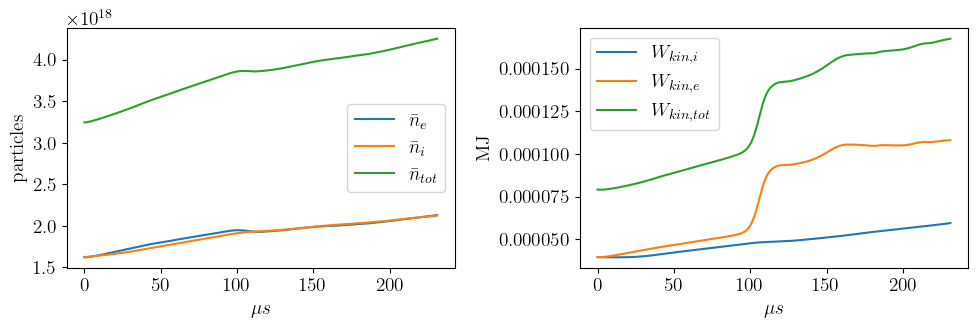

In [9]:
fieldnames = [['ne','ni','ntot'],['Wi','We','Wtot']] # this is for Bimaxwellian moments
time = pygkyl.plot_utils.plot_integrated_moment(simulation,fieldnames=fieldnames,ddt=False,twindow=[])

One can also check the integrated Hamiltonian and boundary fluxes if we are using a recent version of gkylzero (March 2025).

In [10]:
# fieldnames = [['ne','ni','ntot'],['He','Hi','Htot']]
# time = pygkyl.plot_utils.plot_integrated_moment(simulation,fieldnames=fieldnames, ddt=True)
# fieldnames = [['bflux_x_l_ntot','bflux_x_u_ntot','bflux_z_l_ntot','bflux_z_u_ntot','bflux_total_ntot'],
#               ['bflux_x_l_Htot','bflux_x_u_Htot','bflux_z_l_Htot','bflux_z_u_Htot','bflux_total_Htot']]
# time = pygkyl.plot_utils.plot_integrated_moment(simulation,fieldnames=fieldnames, ddt=True)

### 2.1 Profile relaxation <a id="1d_profile"></a>
Plot 1D cuts for multiple time frames.
- `cut_direction`   The dimension that remains after the cut. Can be 'x','y','z' and 'ky'.
- `cut_coords`      The coordinate of the cut, can be a double corresponding to the physical position (in the normalized units defined above), an integer to select an index or 'avg' to average over the dimension.
- `fieldnames`      The fields we want to plot. An array of char will create a multi plot. (see simulation.display_available_fields())
- `frames`          The frames to plot


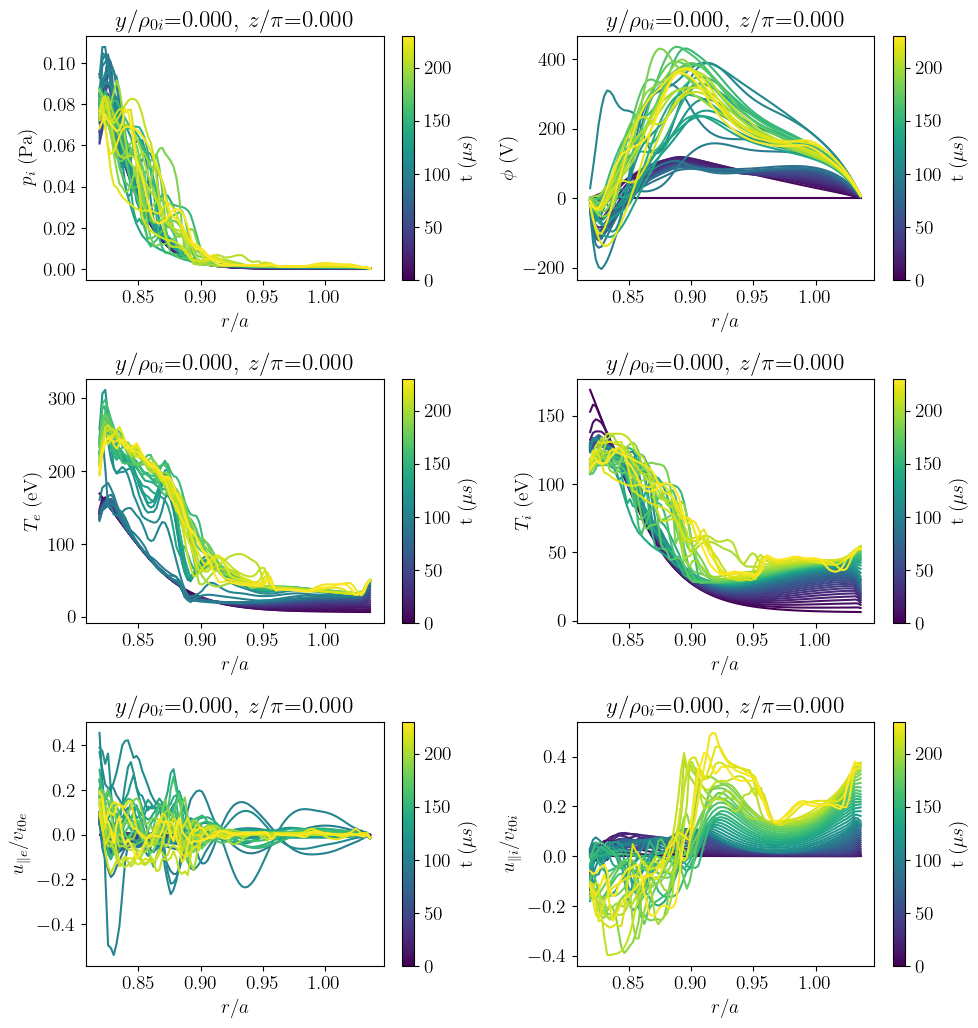

In [11]:
cut_direction='x' 
cut_coords=[0.0,0.0]
fieldnames = ['pi','phi','Te','Ti','upare','upari']
frames = sim_frames[::5]
pygkyl.plot_utils.plot_1D_time_evolution(simulation,cut_direction,cut_coords,fieldnames,frames,space_time = False)

### 2.2 Space-Time Diagrams <a id="space_time"></a>
Generate space-time diagrams for specified fields. Very useful to see the dynamics without a movie

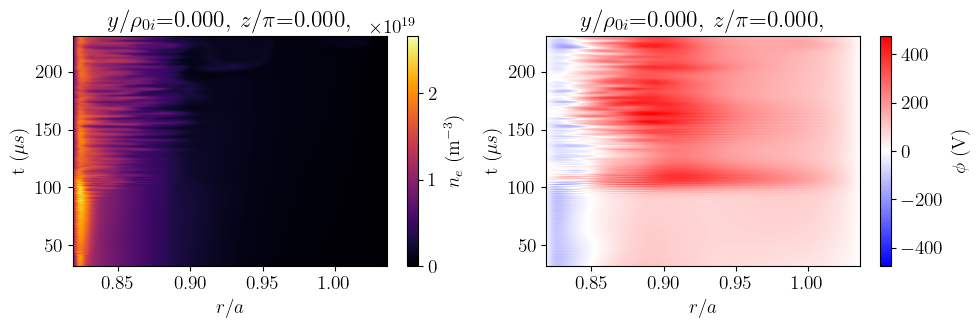

In [12]:
cut_dir = 'x'
cut_coord = [0.0, 0.0]
fieldnames = ['ne', 'phi']
frames = sim_frames[-200:]
figout = []
pygkyl.plot_utils.plot_1D_time_evolution(simulation, cut_dir, cut_coord, fieldnames, frames, space_time=True, plot_type='imshow', figout=figout)
# figout[0].savefig('ne_phi_space_time.png', dpi=300, bbox_inches='tight') # if you want to save the figure

### 2.3 Two-dimensional Cut <a id="2d_cut"></a>
Generate a 2D cut plot at a specified plane and time frame.

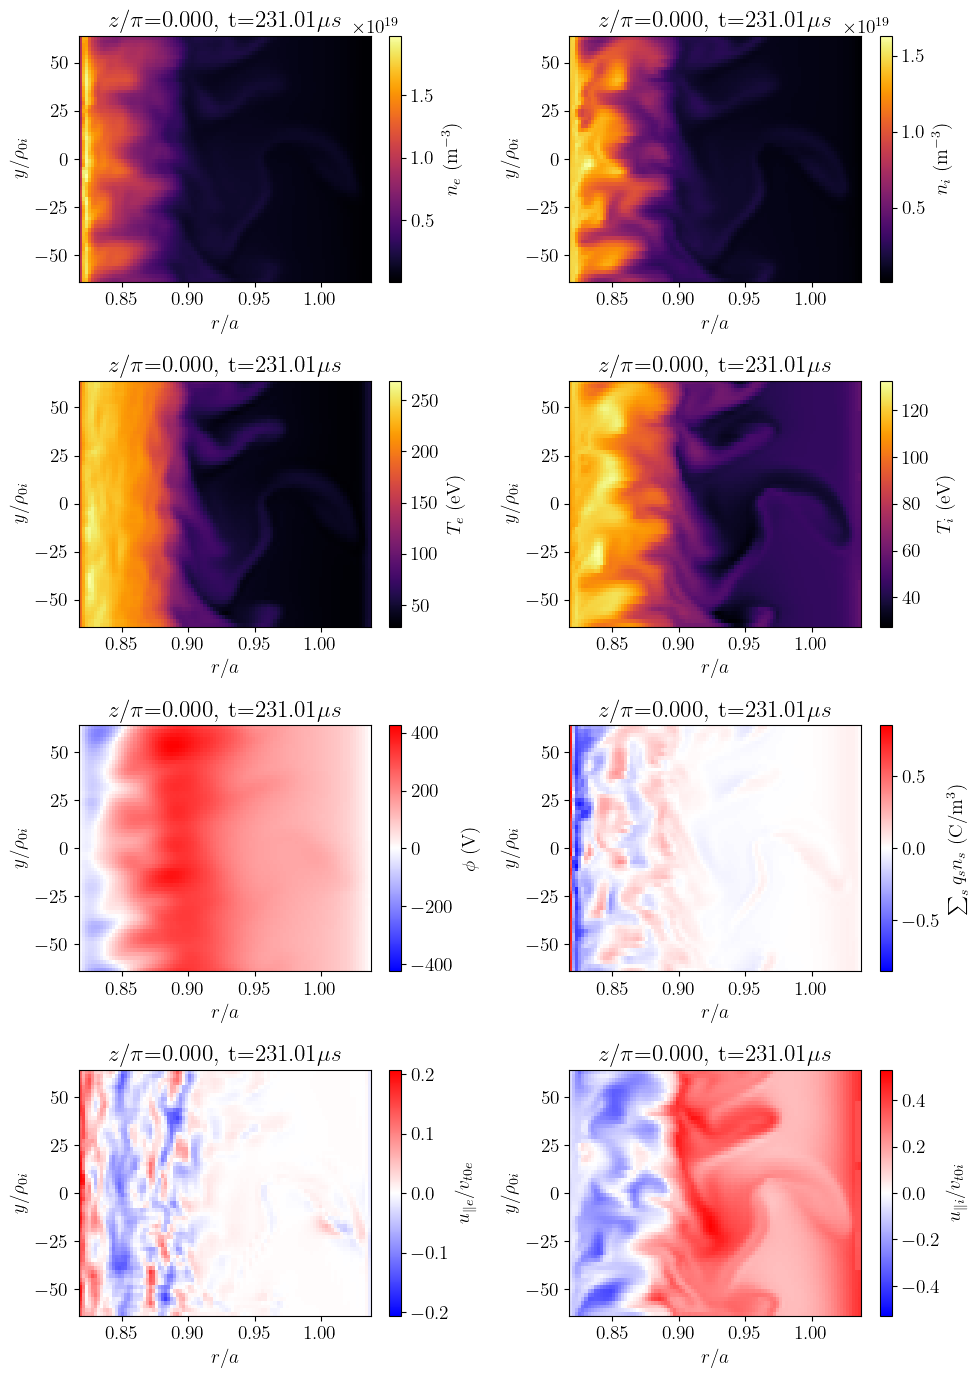

In [13]:
cut_dir = 'xy' # the plane we want to plot
cut_coord = 0.0 # the coordinate were the plan stands If normalized units are defined, 
# this number is in the normalize units. One can also specify a integer for array index 
# or 'avg' to get an average over the reduced dim.
time_frame = sim_frames[-1] # the time frame
fieldnames = ['ne', 'ni', 'Te', 'Ti', 'phi', 'qdens', 'upare', 'upari'] # the fields to plot, see simulation.display_available_fields() (some may not work in 2x2v)
pygkyl.plot_utils.plot_2D_cut(simulation, cut_dir, cut_coord, time_frame,fieldnames,plot_type='pcolormesh')

### 2.4 Space Time and 2D cut Fluctuation <a id="st_fluct_plot"></a>
Generate a fluctuation plot by averaging over a time window and then substracting this average to each time frame. The average is performed against time only. If `coords` is set to be 'avg', additional averages are performed for both background and fluctuations.

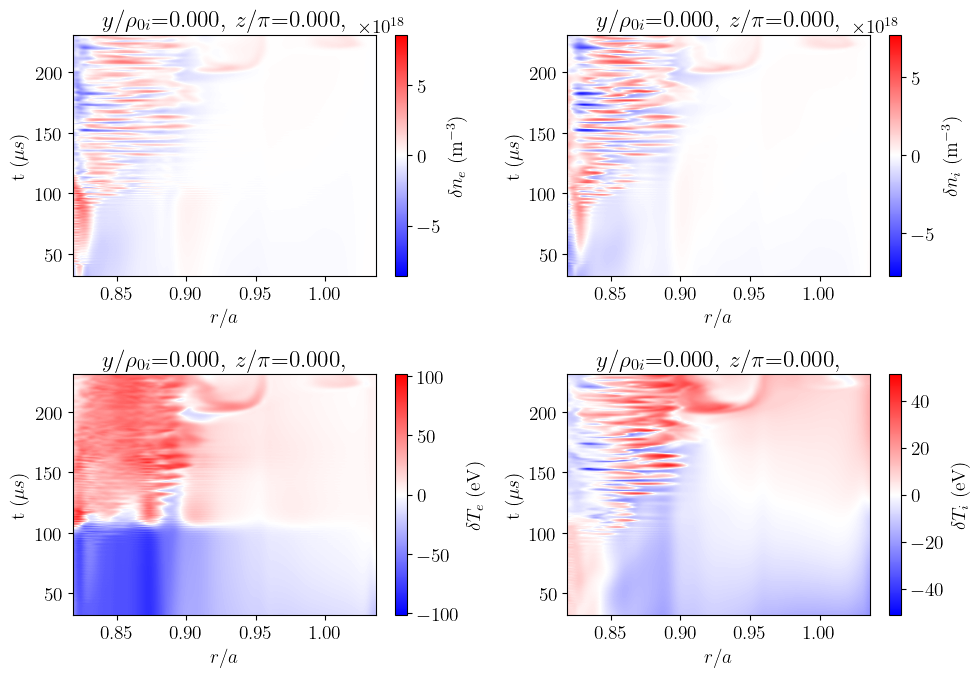

In [14]:
cut_direction='x' 
cut_coords=[0.0,0.0]
fieldnames = ['ne','ni','Te','Ti']
frames = sim_frames[-200:]
pygkyl.plot_utils.plot_1D_time_evolution(
    simulation,cut_direction,cut_coords,fieldnames,frames,
    space_time = True, fluctuation = True, plot_type='imshow')

### 2.5 Two-Dimensional Fluctuation <a id="2d_fluct_plot"></a>
Display the fluctuation of a field on a 2D plane
We can set `fluctuation='opt1_opt2'` where `opt1` can be 'tavg' or 'yavg', for fluctuation to the time average or the y average respectively. `opt2` can be 'relative' to have a relative fluctuation in percents.

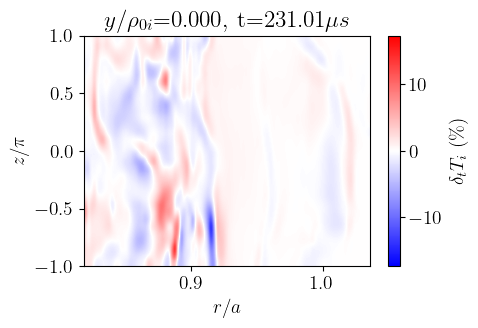

In [15]:
cplane='xz' 
ccoord = 0.0
frames = sim_frames[-2:]
fieldnames = ['Ti']
pygkyl.plot_utils.plot_2D_cut(
    simulation, cplane, ccoord, frames, fieldnames,
    time_average = False, fluctuation = 'tavg_relative',plot_type='imshow')

### 2.6 Time-Averaged Profile  <a id="time_averaged_profile"></a>
Here we show the ExB shear averaged over time of the last 50 frames. We generate also error bars that are related to the standard deviation.

/opt/anaconda3/envs/pgkyl/lib/python3.12/site-packages/pygkyl/utils/plot_utils.py:63: SyntaxWarning: invalid escape sequence '\%'
  vlabel = vlabel + ' (\%)'
/opt/anaconda3/envs/pgkyl/lib/python3.12/site-packages/pygkyl/utils/plot_utils.py:219: SyntaxWarning: invalid escape sequence '\%'
  lbl = lbl + ' (\%)'


KeyError: "Cannot find receipe for 'sExBy_x'. You can check available field names with simulation.data_param.info()"

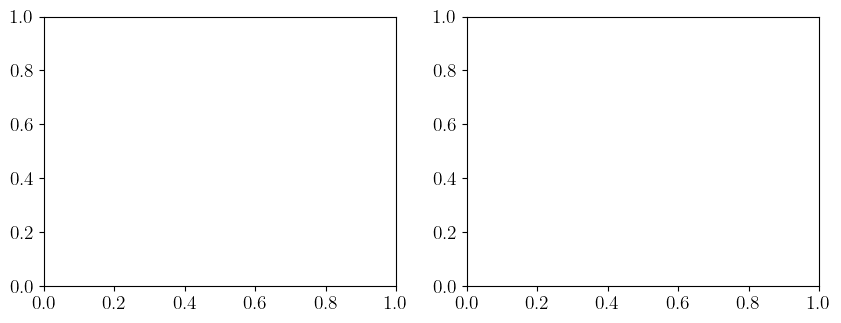

In [16]:
cdirection='x'
ccoords=['avg',0.0]
fieldnames = ['sExBy_x','gradlogTe']
ccoords=['avg','avg']
time_frames = sim_frames[-20:]
pygkyl.plot_utils.plot_1D(
    simulation,cdirection,ccoords,fieldnames,
    time_frames, errorbar = True,)

### 2.7 Movie Generator <a id="movie_generator"></a>
Create a first movie of 2D cuts over time and a second of the fluctuations over the last 25 frames

In [ ]:
cut_dir = 'xy'
cut_coord = 0.0
time_frames = sim_frames[-100:]
fieldnames = ['Ti']
movieprefix = 'example_movie'
clim = []
pygkyl.plot_utils.make_2D_movie(simulation, cut_dir=cut_dir, cut_coord=cut_coord, clim = clim,
                                time_frames=time_frames, fieldnames=fieldnames, 
                                movieprefix=movieprefix, plot_type='pcolormesh')

We can also make a movie of fluctuations. The background is the average of the values during the movie time.

In [ ]:
cut_dir = 'xy'
cut_coord = 0.0
time_frames = sim_frames[-2:]
fluctuation = True
fieldnames = ['Ti']
movieprefix = 'example_movie_fluct'
pygkyl.plot_utils.make_2D_movie(simulation, cut_dir=cut_dir, cut_coord=cut_coord, 
                                time_frames=time_frames, fieldnames=fieldnames, 
                                fluctuation=fluctuation, movieprefix=movieprefix, plot_type='imshow')

### 2.8 Flux Surface Time-Average Profiles <a id="fs_time_averaged_profile"></a>
We also add a small example on how to save the figure. You can replot it by following the example in `pygkyl/examples/load_figout.py`.

In [ ]:
figout = []
cdirection='x'; ccoords=['avg','avg']
pygkyl.plot_utils.plot_1D(
        simulation,cdirection,ccoords,
        fieldnames = [['ne','ni'],['upare','upari'],
                      ['Te','Ti'],['pe','pi'],
                #       'qdens','phi',
                #       ['ExB_hflux_xe','ExB_hflux_xi'], ['Wtote','Wtoti']
                     ],
        time_frames = sim_frames[-2:], errorbar = False, figout = figout
        )
pygkyl.fig_tools.save_figout(figout,'fig_profiles') # this allows you to reload and replot with additional data

### 2.9 Time series <a id="time_series"></a>


In [ ]:
fieldnames = [['ne','ni'],'phi']
cut_coords = [1.1,'avg',0]
time_frames = sim_frames[-5:]
pygkyl.plot_utils.plot_time_serie(simulation,fieldnames,cut_coords,time_frames)

### 2.10 Phase Space Analysis <a id="dist_funct"></a>
This is done manually directly with the pgkyl routines. The distribution function files are usually very slow to load.

In [ ]:
#---------- 2D cuts of a frame of the distribution function (long to load)
if False: #set it to true if you have some dist function data
    import postgkyl as pg
    import copy
    # Simulation frame for dist. func.
    fieldname = 'ion' #e.g. we check the electrostatic field files.
    f_frames = pygkyl.file_utils.find_available_frames(simulation,fieldname)
    tf = f_frames[-1]
    # Point where each cuts intersect [in Gkeyll units or indices]
    xf = '0.025'
    yf = '0.0'
    zf = '0.0'
    vf = '0.0'
    mf = '0.0'
    # Note: On Perlmutter, I had to copy the file
    #   postgkyl/src/postgkyl/output/postgkyl.mplstyle
    # to the local directory the postgkyl output files to be able to load them
    #   /global/u1/a/ah1032/.local/lib/python3.11/site-packages/postgkyl/output
    for spec in simulation.species.values():
        #---- Load the distf
        fname = simulation.get_filename('f'+spec.nshort,tf)
        data = pg.data.GData(fname)
        dg = pg.data.GInterpModal(data,1,'ms')
        dg.interpolate(0,overwrite=True)

        #---------------- 2D vpar x plots
        cut = copy.copy(data)
        pg.data.select(data=cut, z1=yf, z2=zf, z4=mf, overwrite=True)
        pg.output.plot(cut, yscale=1./spec.vt,
                    title=r"y=%s, z=%s, $\mu$=%s, t=%2.2e (s)"%(yf,zf,mf,data.ctx['time']),
                    contour=False,diverging=False, xshift=-simulation.geom_param.x_LCFS,
                    xlabel=r'$R-R_{lcfs}\,(m)$',ylabel=r'$v_\parallel/v_{th%s}$'%spec.nshort,
                    clabel=r'$f_{%s}$'%spec.nshort);

        #---------------- 2D mu x plots
        cut = copy.copy(data)
        pg.data.select(cut, z1=yf, z2=zf, z3=vf, overwrite=True)
        pg.output.plot(cut, yscale=1./spec.mu0,
                    title=r"y=%s, z=%s, $v_\parallel$=%s, t=%2.2e (s)"%(yf,zf,mf,data.ctx['time']),
                    contour=False,diverging=False, xshift=-simulation.geom_param.x_LCFS,
                    xlabel=r'$R-R_{lcfs}\,(m)$',ylabel=r'$\mu B/T_{%s}$'%spec.nshort,
                    clabel=r'$f_{%s}$'%spec.nshort);

        #---------------- 2D vpar mu plots
        cut = copy.copy(data)
        pg.data.select(cut, z0=xf, z1=yf, z2=zf, overwrite=True)
        pg.output.plot(cut, yscale=1./spec.mu0,
                    title=r"x=%s, y=%s, z=%s, t=%2.2e (s)"%(xf,yf,zf,data.ctx['time']),
                    contour=False,diverging=False, xshift=-simulation.geom_param.x_LCFS,
                    xlabel=r'$v_\parallel/v_{th%s}$'%spec.nshort,ylabel=r'$\mu B/T_{%s}$'%spec.nshort,
                    clabel=r'$f_{%s}$'%spec.nshort);

### 2.11 DG representation <a id="dg_rep"></a>
Plot the data in the DG form with cells and segments (1D only)

In [ ]:
fieldname = 'Ti'
sim_frame = sim_frames[-1]
cutdir = 'x'
cutcoord = [0.0, 0.0]
xlim = []
pygkyl.plot_utils.plot_DG_representation(simulation, fieldname, sim_frame, cutdir, cutcoord, xlim)

### 2.12 Poloidal projection plot <a id="pol_plot"></a>
Project the flux tube on a poloidal plane (play with `nzInterp` to change resolution vs comp. time).

First we declare a poloidal projection object and set it up (declaring it upfront spares some run time as it can be reused for different plots.)

In [ ]:
polproj = pygkyl.PoloidalProjection()
polproj.setup(simulation,nzInterp=24)

Now we can plot different fields like the ion pressure in a logarithmic scale:

In [ ]:
polproj.plot('pi',timeFrame=sim_frames[-1],colorScale='linear',clim=[])

We can also plot the fluctuations (also available for movies)

In [ ]:
polproj.plot('ni',timeFrame=sim_frames[-10:],fluctuation='tavg')

In [ ]:
polproj.plot('ni',timeFrame=sim_frames[-1],fluctuation='relative_yavg',clim=[-50,50])

Or the radial component of the gradB drift
(here we also show how to customize the inset)

In [ ]:
polproj.inset.zoom = 1.8 # adjust the zoom of the inset
polproj.inset.xlim = [0.57,0.67] # set the x-axis limits of the inset
polproj.inset.ylim = [0.02,0.25] # set the y-axis limits of the inset
polproj.inset.markloc = [2,3] # provide the corner to mark the inset (1 low L, 2 low R, 3 up L, 4 up R)
polproj.inset.lower_corner_rel_pos = (0.3,0.3) # set the relative position of the inset on the main plot
climInset = [-20,20] # custom colorbar limits for the inset plot
polproj.plot('gradBxB_xi',timeFrame=sim_frames[-1],climInset=climInset)
polproj.reset_inset() # reset the inset to the default values

It is possible to plot the projection only in a provided radial interval.

In [ ]:
polproj = pygkyl.PoloidalProjection()
 # Here we use rho=r/a but we can also use Rlim for specifying the major radius limits.
polproj.setup(simulation,nzInterp=24,rholim=[1.0,1.5])
fieldname = 'ni'
timeFrame = sim_frames[-1]
polproj.inset.xlim = [simulation.geom_param.R_LCFSmid, simulation.geom_param.Rmid_max]
polproj.plot('ni',timeFrame=sim_frames[-1],colorScale='linear',clim=[],fluctuation='')

You can also create a movie of the poloidal projection

In [ ]:
polproj.movie('ni',moviePrefix='gallery/mov_example_',timeFrames=sim_frames[-5:],colorScale='log')

### 2.13 Flux surface projection plot <a id="fs_plot"></a>
Project the flux tube on a flux surface.

In [ ]:
fsproj = pygkyl.FluxSurfProjection()

In [ ]:
fieldname = 'ni'
rho = 1.2
Nint = 32
overSampFact = 2
timeFrame = sim_frames[-10]
fsproj.setup(simulation, Nint=Nint, rho=rho, smooth=True)
fsproj.plot(fieldName=fieldname, timeFrame=timeFrame, fluctuation='')

In [ ]:
fsproj.plot(fieldName=fieldname, timeFrame=timeFrame, fluctuation='yavg_relative')

### 2.14 Toroidal projection plot <a id="tor_plot"></a>
Project the flux tube on the tokamak geometry using `pyvista`.
Be sure to install the required modules:
```
# !{sys.executable} -m pip install pyvista trame trame-vtk trame-vuetify imageio ipywidgets
```
with `jupyter_backend`, we can have an interactive plot window if it is set to `'trame'` or `'html'`.

In [ ]:
torproj = pygkyl.TorusProjection()
torproj.setup(simulation, 
              Nint_polproj=24, # number of interpolation points for the poloidal projection
              Nint_fsproj=32, # number of points along the toroidal direction
              phiLim = [0, 3*3.14/2], 
              rhoLim = [1,-4]
              )

In [ ]:
fieldname = 'ni'
timeFrame = sim_frames[-1]
logScale = True
clim = [1e17,2e19]
filePrefix = ''
jupyter_backend='none' # set to 'trame' if you want to use the jupyter backend
torproj.plot(fieldName=fieldname, timeFrame=timeFrame, colorbar=True,
             fluctuation='',clim=clim, logScale = logScale, jupyter_backend=jupyter_backend,
             vessel=True, filePrefix=filePrefix, imgSize=(800,600))

In [ ]:
fieldname = 'ni'
timeFrames = sim_frames[-2:]
fluctuation = ''
logScale = True
clim = [3e17,3e19]
fileprefix = ''

torproj.movie(fieldName=fieldname, timeFrames=timeFrames, 
              fluctuation=fluctuation, clim=clim, logScale=logScale, 
              vessel=True, filePrefix=fileprefix, imgSize=(800,600))

## 3. Interfaces <a id="interfaces"></a>
Here we present a few examples of interfaces built in `pygkyl` to read other codes data.

### 3.1 Thungsten transport with Flan <a id="flan"></a>
After setting a path, one can use any of the above plotting routine to plot Thungsten fields obtained with Flan simulations (S. Zamperini).
The available Flan files are:
- 'flan_imp_density'
- 'flan_imp_counts'
- 'flan_imp_vX', 'flan_imp_vY', 'flan_imp_vZ'
It will use the metric and configuration of the Gkeyll simulation loaded previously.

In [ ]:
if False: # set to True if you want to use the flan interface
    path = '/Users/ahoffman/personal_gkyl_scripts/sim_data_dir_example/flan_data/iwl_test.nc'
    simulation.set_flandata(path)

In [ ]:
if False: # set to True if you want to use the flan interface
    cut_dir = 'x'
    cut_coord = ['avg','avg']
    fieldnames = ['flan_imp_density']
    frames = simulation.flanframes[:]
    figout = []
    clim = [0,1e-6]
    pygkyl.plot_utils.plot_1D_time_evolution(simulation, cut_dir, cut_coord, fieldnames, twindow=frames,
                                            space_time=True, plot_type='imshow', figout=figout, clim=clim)

### 3.2 Local GK flux tube simulations with GYACOMO <a id="gyacomo"></a>
We can also read simulations from GYACOMO (Hoffmann et al. 2023) and use all the routines developped above. 
One has to decide on the region of study as GYACOMO is a local code.

In [ ]:
if False: # set to True if you want to use the GYACOMO interface
    path = '/Users/ahoffman/gyacomo/simulations/cyclone/outputs_00.h5'
    simulation = pygkyl.simulation_configs.import_config('gyacomo', path)

    sim_frames = simulation.available_frames['field']
    cut_dir = 'xy'
    cut_coord = 0.0 
    time_frame = sim_frames[-1] 
    fieldnames = ['phi']
    pygkyl.plot_utils.plot_2D_cut(simulation, cut_dir, cut_coord, time_frame,fieldnames,plot_type='imshow')